# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
base_url ="http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | pariaman
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | cherdyn'
Processing Record 6 of Set 1 | nicoya
Processing Record 7 of Set 1 | afaahiti
Processing Record 8 of Set 1 | ochsenhausen
Processing Record 9 of Set 1 | ad dabbah
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | ust-nera
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | karratha
Processing Record 14 of Set 1 | malayer
Processing Record 15 of Set 1 | pointe-noire
Processing Record 16 of Set 1 | tonghae
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | qaqortoq
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | argo
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | georgetown
Processing Record

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,26.99,83,75,4.63,CC,1687488877
1,pariaman,-0.6190,100.1200,28.03,73,34,2.16,ID,1687488898
2,port-aux-francais,-49.3500,70.2167,8.01,97,100,17.66,TF,1687489012
3,margaret river,-33.9500,115.0667,12.60,62,86,9.54,AU,1687488879
4,cherdyn',60.4030,56.4787,9.33,57,42,2.04,RU,1687489012


In [7]:
# Convert date to human readable date
import datetime as dt

city_data_df['Date']= dt.datetime.utcfromtimestamp(
   city_weather["dt"]+ city_weather['timezone'])
city_data_df['Date']= city_data_df['Date'].dt.date

In [8]:
import os
output_dir= "output_data"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

In [9]:
# Export the City_Data into a csv
csv_file_path= os.path.join(output_dir, "cities.csv")
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,26.99,83,75,4.63,CC,2023-06-22
1,pariaman,-0.6190,100.1200,28.03,73,34,2.16,ID,2023-06-22
2,port-aux-francais,-49.3500,70.2167,8.01,97,100,17.66,TF,2023-06-22
3,margaret river,-33.9500,115.0667,12.60,62,86,9.54,AU,2023-06-22
4,cherdyn',60.4030,56.4787,9.33,57,42,2.04,RU,2023-06-22


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

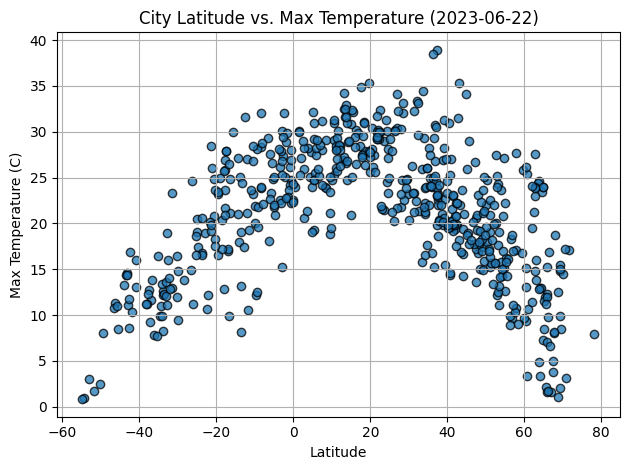

In [11]:
# Build scatter plot for latitude vs. temperature
lat= df['Lat']
temp= df['Max Temp']
plt.scatter(lat, temp, edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2023-06-22)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude Vs. Humidity

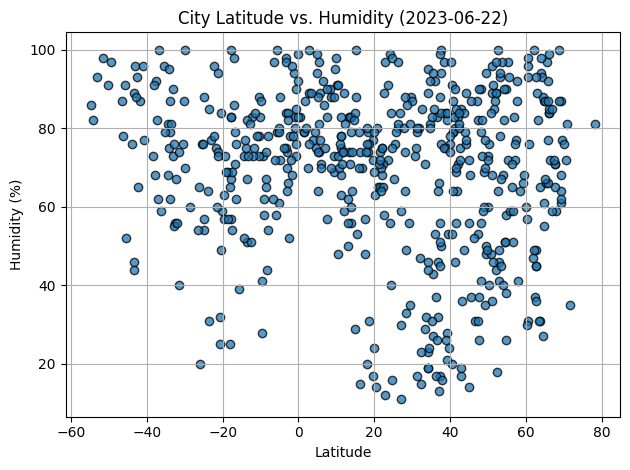

In [12]:
# Build the scatter plots for latitude vs. humidity
lat= df['Lat']
humidity= df['Humidity']
plt.scatter(lat, humidity, edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-06-22)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude Vs. Cloudiness

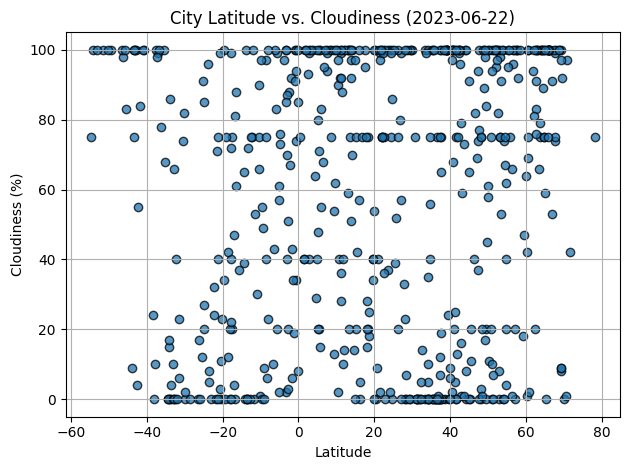

In [13]:
# Build the scatter plots for latitude vs. cloudiness
lat= df['Lat']
cloudiness= df['Cloudiness']
plt.scatter(lat, cloudiness, edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-06-22)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

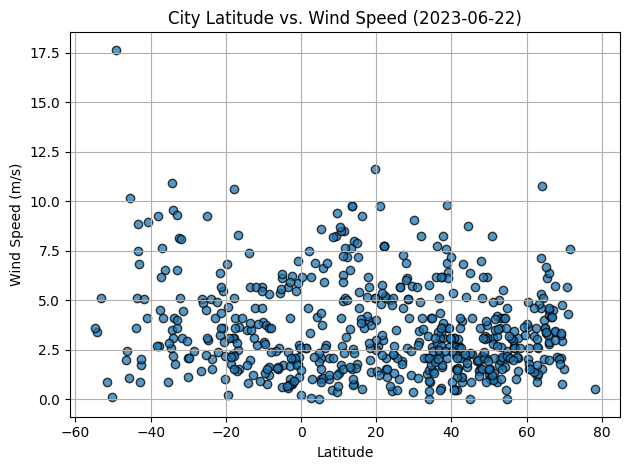

In [14]:
# Build the scatter plots for latitude vs. wind speed
lat= df['Lat']
wind_speed= df['Wind Speed']
plt.scatter(lat, wind_speed, edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-06-22)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.tight_layout()
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def regress_line(x,y):
    slope, intercept, rvalue, pvalue, stderr= linregress(x,y)
    regress_line=  slope* x+ intercept
    return regress_line

In [16]:
# Define a function to create line equation string
def line_eq(x,y):
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    return line_eq

In [17]:
# Define a function to print r-value
def r_val(x,y):
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    return rvalue

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
filt= df['Lat'] >= 0
northern_hemi_df= df[filt]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,cherdyn',60.4030,56.4787,9.33,57,42,2.04,RU,2023-06-22
5,nicoya,10.1483,-85.4520,24.76,91,100,1.34,CR,2023-06-22
7,ochsenhausen,48.0667,9.9500,16.80,90,75,5.14,DE,2023-06-22
8,ad dabbah,18.0500,30.9500,27.63,20,28,3.96,SD,2023-06-22
9,fortuna,40.5982,-124.1573,14.40,91,100,3.09,US,2023-06-22


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
filt= df['Lat'] < 0
southern_hemi_df= df[filt]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,26.99,83,75,4.63,CC,2023-06-22
1,pariaman,-0.6190,100.1200,28.03,73,34,2.16,ID,2023-06-22
2,port-aux-francais,-49.3500,70.2167,8.01,97,100,17.66,TF,2023-06-22
3,margaret river,-33.9500,115.0667,12.60,62,86,9.54,AU,2023-06-22
6,afaahiti,-17.7500,-149.2833,26.93,83,99,10.63,PF,2023-06-22


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7011856289984334


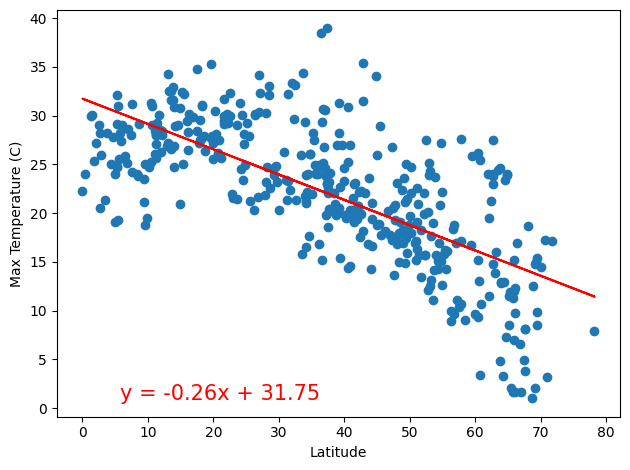

In [20]:
# Linear regression on Northern Hemisphere
lat=northern_hemi_df['Lat']
temp= northern_hemi_df['Max Temp']

plt.scatter(lat, temp)
plt.plot(lat, regress_line(lat,temp), color='r')

plt.annotate(line_eq(lat, temp),(5.8,0.8),fontsize=15,color="red")


plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

print (f"The r-value is: {r_val(lat, temp)}")
plt.tight_layout()
plt.show()

The r-value is: 0.7865685510079243


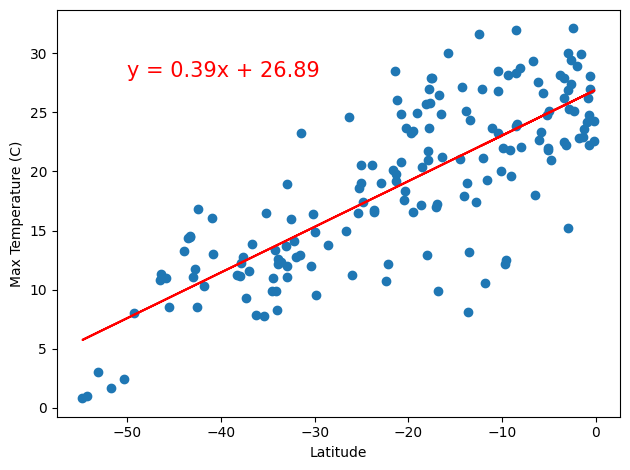

In [21]:
# Linear regression on Southern Hemisphere

lat=southern_hemi_df['Lat']
temp= southern_hemi_df['Max Temp']

plt.scatter(lat, temp)
plt.plot(lat, regress_line(lat,temp), color='r')

plt.annotate(line_eq(lat, temp),(-50,28),fontsize=15,color="red")


plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

print (f"The r-value is: {r_val(lat, temp)}")
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:** 
The correlation coefficients obtained indicate a moderately strong negative linear relationship between latitude and temperature in the northern hemisphere and a reasonably strong positive linear relationship in the southern hemisphere. 

These coefficients suggest that as latitude increases in the northern hemisphere, there is a tendency for temperature to decrease, while in the southern hemisphere, there is a tendency for temperature to increase with higher latitudes.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.07708700655746901


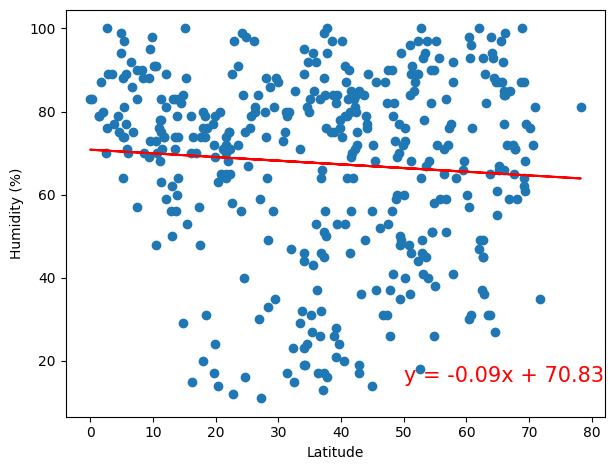

In [22]:
# Northern Hemisphere
lat=northern_hemi_df['Lat']
humidity= northern_hemi_df['Humidity']

plt.scatter(lat, humidity)
plt.plot(lat, regress_line(lat,humidity), color='r')

plt.annotate(line_eq(lat, humidity),(50 ,15),fontsize=15,color="red")


plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print (f"The r-value is: {r_val(lat,humidity)}")
plt.tight_layout()
plt.show()

The r-value is: -0.07712841706772881


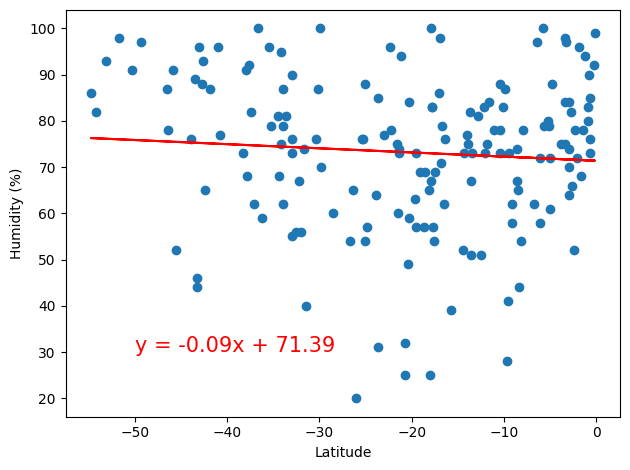

In [23]:
# Southern Hemisphere

lat=southern_hemi_df['Lat']
humidity= southern_hemi_df['Humidity']

plt.scatter(lat, humidity)
plt.plot(lat, regress_line(lat,humidity), color='r')

plt.annotate(line_eq(lat, humidity),(-50 ,30),fontsize=15,color="red")


plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print (f"The r-value is: {r_val(lat,humidity)}")
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:**
In the northern hemisphere, this suggests that there is a slight tendency for humidity levels to decrease as you move away from the equator towards higher latitudes. However, the correlation coefficient of indicates that the relationship is quite weak, meaning that other factors are likely to have a stronger influence on humidity levels in specific locations.

Similarly, in the southern hemisphere, the correlation coefficient suggests a weak negative association between latitude and humidity. This implies that as you move towards higher latitudes in the southern hemisphere, there may be a slight decrease in humidity levels, but again, other factors can play a more significant role in determining humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.042540565738975814


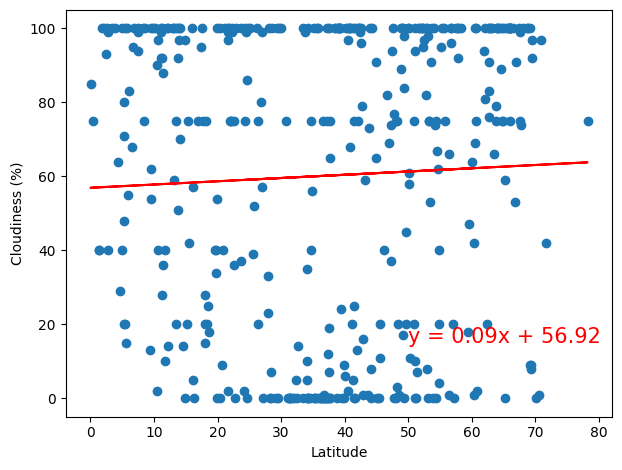

In [24]:
# Northern Hemisphere

lat=northern_hemi_df['Lat']
cloudiness= northern_hemi_df['Cloudiness']

plt.scatter(lat, cloudiness)
plt.plot(lat, regress_line(lat,cloudiness), color='r')

plt.annotate(line_eq(lat, cloudiness),(50 ,15),fontsize=15,color="red")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print (f"The r-value is: {r_val(lat,cloudiness)}")
plt.tight_layout()
plt.show()

The r-value is: -0.07953448470559624


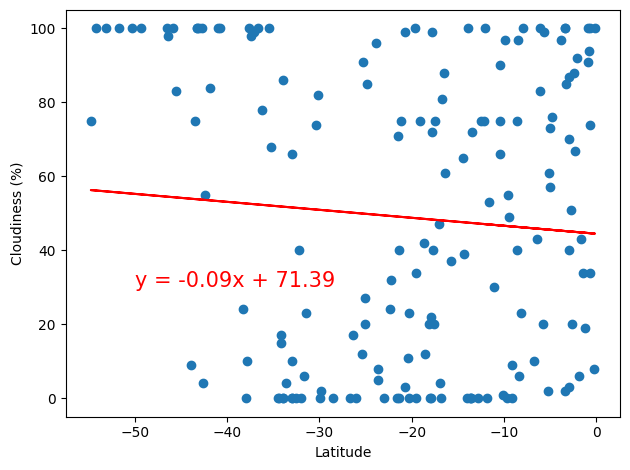

In [25]:
# Southern Hemisphere
lat=southern_hemi_df['Lat']
cloudiness= southern_hemi_df['Cloudiness']

plt.scatter(lat, cloudiness)
plt.plot(lat, regress_line(lat,cloudiness), color='r')

plt.annotate(line_eq(lat, humidity),(-50 ,30),fontsize=15,color="red")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print (f"The r-value is: {r_val(lat,cloudiness)}")
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:** 
In the northern hemisphere, the correlation coefficient indicates a very weak negative relationship between latitude and cloudiness. This suggests that as latitude increases, there may be a slight tendency for cloudiness to decrease. However, the effect is minimal and not strongly evident, indicating a weak association between the two variables.

On the other hand, in the southern hemisphere, the correlation coefficient suggests a weak negative association between latitude and cloudiness. As latitude increases in the southern hemisphere, there is a tendency for cloudiness to decrease. The relationship is relatively stronger compared to the northern hemisphere, implying a more pronounced effect of latitude on cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.14554801862961086


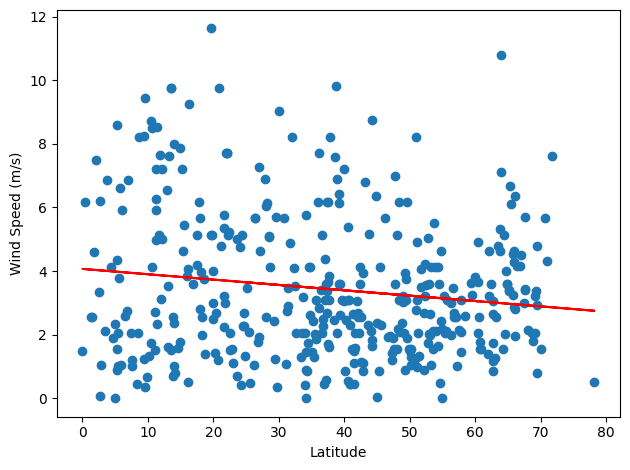

In [26]:
# Northern Hemisphere

lat=northern_hemi_df['Lat']
wind_speed= northern_hemi_df['Wind Speed']

plt.scatter(lat, wind_speed)
plt.plot(lat, regress_line(lat,wind_speed), color='r')

plt.annotate(line_eq(lat, wind_speed),(50 ,15),fontsize=15,color="red")


plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

print (f"The r-value is: {r_val(lat,wind_speed)}")
plt.tight_layout()
plt.show()

The r-value is: -0.2836188768440885


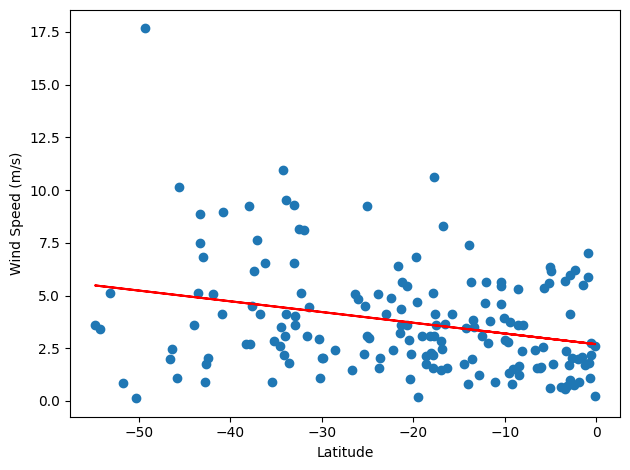

In [27]:
# Southern Hemisphere

lat= southern_hemi_df['Lat']
wind_speed=southern_hemi_df['Wind Speed']

plt.scatter(lat, wind_speed)
plt.plot(lat, regress_line(lat,wind_speed), color='r')

plt.annotate(line_eq(lat, wind_speed),(-50 ,30),fontsize=15,color="red")


plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

print (f"The r-value is: {r_val(lat,wind_speed)}")
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:**
In the northern hemisphere, the correlation coefficient suggests a weak negative association between latitude and windspeed. This implies that as you move away from the equator towards higher latitudes in the northern hemisphere, there may be a slight tendency for windspeed to decrease. However, the correlation coefficient indicates that the relationship is not very strong.

Similarly, in the southern hemisphere, the correlation coefficient indicates a weak negative relationship between latitude and windspeed. As you move towards higher latitudes in the southern hemisphere, there may be a slight tendency for windspeed to decrease. Once again, the correlation coefficient suggests a weak association rather than a strong one.